# S&P 500 指数 週足 移動メディアン

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = '^GSPC'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00-05:00,4049.270020,4195.439941,4015.550049,4136.479980,23657120000,0.0,0.0
2023-02-06 00:00:00-05:00,4119.569824,4176.540039,4060.790039,4090.459961,20661640000,0.0,0.0
2023-02-13 00:00:00-05:00,4096.620117,4159.770020,4047.949951,4079.090088,19642940000,0.0,0.0
2023-02-20 00:00:00-05:00,4052.350098,4052.350098,3943.080078,3970.040039,16031550000,0.0,0.0
2023-02-27 00:00:00-05:00,3992.360107,4048.290039,3928.159912,4045.639893,21459460000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,5920.669922,5949.339844,5829.529785,5942.470215,13850620000,0.0,0.0
2025-01-06 00:00:00-05:00,5982.810059,6021.040039,5807.779785,5827.040039,18651120000,0.0,0.0
2025-01-13 00:00:00-05:00,5782.020020,6014.959961,5773.310059,5996.660156,21760690000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00-05:00,3255.350098,3293.469971,3214.679932,3225.520020,15451870000,0.0,0.0
2020-02-03 00:00:00-05:00,3235.659912,3347.959961,3235.659912,3327.709961,19500010000,0.0,0.0
2020-02-10 00:00:00-05:00,3318.280029,3385.090088,3317.770020,3380.159912,18077170000,0.0,0.0
2020-02-17 00:00:00-05:00,3369.040039,3393.520020,3328.449951,3337.750000,15292560000,0.0,0.0
2020-02-24 00:00:00-05:00,3257.610107,3259.810059,2855.840088,2954.219971,31566850000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,5920.669922,5949.339844,5829.529785,5942.470215,13850620000,0.0,0.0
2025-01-06 00:00:00-05:00,5982.810059,6021.040039,5807.779785,5827.040039,18651120000,0.0,0.0
2025-01-13 00:00:00-05:00,5782.020020,6014.959961,5773.310059,5996.660156,21760690000,0.0,0.0


In [3]:
period = 13
r_last = len(df0)
r1 = 0
df0['MM13'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm13 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM13'] = mm13
    r1 += 1

In [4]:
period = 26
r_last = len(df0)
r1 = 0
df0['MM26'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm26 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM26'] = mm26
    r1 += 1

In [5]:
period = 52
r_last = len(df0)
r1 = 0
df0['MM52'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm52 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM52'] = mm52
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MM13,MM26,MM52
Date,,,,,,,,,,
2020-01-27 00:00:00-05:00,3255.350098,3293.469971,3214.679932,3225.520020,15451870000,0.0,0.0,NaN,NaN,NaN
2020-02-03 00:00:00-05:00,3235.659912,3347.959961,3235.659912,3327.709961,19500010000,0.0,0.0,NaN,NaN,NaN
2020-02-10 00:00:00-05:00,3318.280029,3385.090088,3317.770020,3380.159912,18077170000,0.0,0.0,NaN,NaN,NaN
2020-02-17 00:00:00-05:00,3369.040039,3393.520020,3328.449951,3337.750000,15292560000,0.0,0.0,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,3257.610107,3259.810059,2855.840088,2954.219971,31566850000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,5920.669922,5949.339844,5829.529785,5942.470215,13850620000,0.0,0.0,5930.850098,5733.484863,5420.010010
2025-01-06 00:00:00-05:00,5982.810059,6021.040039,5807.779785,5827.040039,18651120000,0.0,0.0,5942.470215,5744.619873,5445.350098
2025-01-13 00:00:00-05:00,5782.020020,6014.959961,5773.310059,5996.660156,21760690000,0.0,0.0,5942.470215,5779.594971,5459.790039


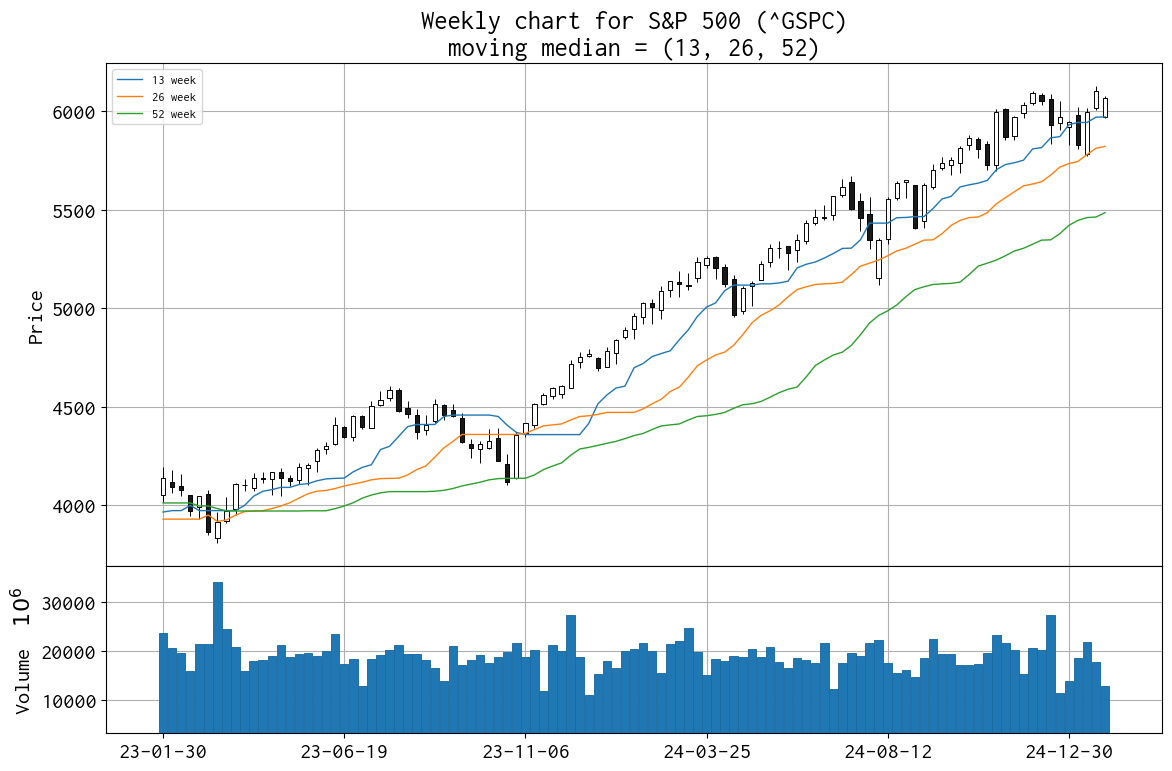

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm13 = df0['MM13']
mm26 = df0['MM26']
mm52 = df0['MM52']
apds  = [
    mpf.make_addplot(mm13[df.index], width=1, label='13 week', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=1, label='26 week', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=1, label='52 week', ax=ax[0]),
]

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_gspc.png')
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0


In [21]:
df.tail(2)['Close']

Date
2025-01-13 00:00:00+09:00    38451.460938
2025-01-20 00:00:00+09:00    39931.980469
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00+09:00            NaN
2025-01-20 00:00:00+09:00    1480.519531
Name: Close, dtype: float64

In [23]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-20 00:00:00+09:00    1260.210938
dtype: float64

In [24]:
df['Close'].rolling(13).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38874.661659
2024-12-30 00:00:00+09:00    38971.501502
2025-01-06 00:00:00+09:00    38939.547476
2025-01-13 00:00:00+09:00    38898.756010
2025-01-20 00:00:00+09:00    39053.991286
Name: Close, Length: 105, dtype: float64

In [25]:
df['Close'].rolling(26).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38528.497746
2024-12-30 00:00:00+09:00    38489.350361
2025-01-06 00:00:00+09:00    38412.416466
2025-01-13 00:00:00+09:00    38350.403846
2025-01-20 00:00:00+09:00    38437.502704
Name: Close, Length: 105, dtype: float64

In [26]:
df['Close'].rolling(52).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38349.995944
2024-12-30 00:00:00+09:00    38475.325120
2025-01-06 00:00:00+09:00    38544.811448
2025-01-13 00:00:00+09:00    38592.661283
2025-01-20 00:00:00+09:00    38673.063401
Name: Close, Length: 105, dtype: float64